In [1]:
import numpy as np
import matplotlib.pyplot as plt

#**9.1. Sampling bias of a uniform variable**

0.24011072882898557

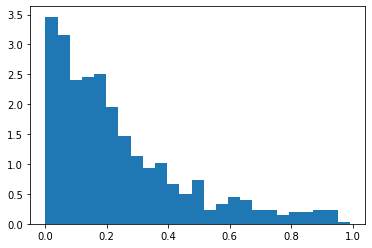

In [ ]:
X = np.random.uniform(size=100000)
P = np.exp(-3.6*X)
P = P / np.sum(P)
S = np.random.choice(X, 1000, p=P)
n, bins, patches = plt.hist(S, 25, density=True)
np.sum(S)/1000

#**9.2. Sampling bias à la Cameron-Martin**

In [2]:
def brownian(interval, step):
  n = int(interval / step)
  B = [0]
  for i in range(n):
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
  return np.array(B)

In [ ]:
B = []
t = np.linspace(0.0, 1.0, 101)
for i in range(100000):
  B.append(brownian(1, 0.01) + t)
  print(B)
B = np.array(B)
B1 = B[:,-1]
P = np.exp(-B1 + 0.5)
P = P / np.sum(P)
i = np.random.choice(100000, 1000, p=P)
S = B[i, :]
n, bins, patches = plt.hist(S[:,50], 25, density=True)

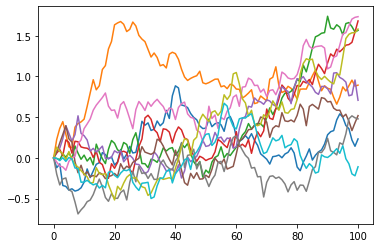

In [ ]:
for i in range(10):
  plt.plot(B[i])

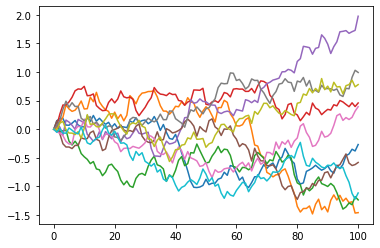

In [ ]:
for i in range(10):
  plt.plot(S[i])

In [ ]:
np.sum(S[:, 50])/1000

0.0063201167472400335

#**9.3. Sampling bias à la Girasnov**

In [ ]:
def riemann(f):
  return np.sum(f) * 0.01

In [ ]:
def ito(X, B):
  dB = B[1:] - B[:-1]
  return np.sum(X[:-1] * dB)

In [ ]:
S = []
P = []
mu = lambda x : -x
sigma = lambda x : 1
for i in range(10000):
  B = brownian(1, 0.01)
  Y = np.zeros((101),)
  Y[0] = 0
  for j in range(100):
    Y[j+1] = sigma(Y[j]) * (B[j+1] - B[j]) + mu(Y[j]) * 0.01 + Y[j]
  S.append(Y)
  P.append(np.exp(ito(Y, B) - 0.5 * riemann(Y**2)))
S = np.array(S)
P = np.array(P)

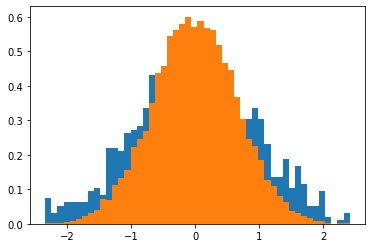

In [ ]:
P = P / np.sum(P)
i = np.random.choice(10000, 1000, p=P)
S1 = S[i, :]
n, bins, patches = plt.hist(S1[:,-1], 50, density=True)
n, bins, patches = plt.hist(S[:,-1], 50, density=True)

Variance of the biased sample of Y1

In [ ]:
np.sum(S1[:,-1] ** 2)/1000 - (np.sum(S1[:,-1])/1000)**2

0.8917172336091682

Variance of the whole sample

In [ ]:
np.sum(S[:,-1] ** 2)/10000 - (np.sum(S[:,-1])/10000)**2

0.4334725642489512